In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
!pip install pypdf
import pypdf

In [11]:
documents=[]
reader=pypdf.PdfReader("/content/Understanding_Indian_MSME_sector_Progress_and_Challenges_13_05_25_Final.pdf") #read pdf
text=""
for page in reader.pages:
  text+=page.extract_text() or ''
documents.append(text)   #extract text

In [12]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
def preprocess_text(text):
  text=text.lower()
  text=re.sub(r'[^a-zA-Z0-9\s.]','',text) # removes characters that are not alphanumeric, whitespace, or a period.
  text=re.sub('[0-9]+','',text)  # removes one or more occurences of digits like 0001000
  text=re.sub(r'\n','',text) # remove all newline characters
  return text # text preprocessing

In the regular expression [0-9]+, the + symbol is a quantifier. It means 'one or more occurrences' of the preceding character or group. In this case, [0-9] matches any single digit from 0 to 9. So, [0-9]+ collectively matches one or more consecutive digits. For example, it would match '1', '12', '123', etc.

In [14]:
doc_txt=[preprocess_text(doc) for doc in documents]

In [15]:
from nltk.tokenize import sent_tokenize,word_tokenize #tokenization

In [16]:
sent=sent_tokenize(str(doc_txt))

In [17]:
from textblob import TextBlob
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return "Positive"
    elif analysis.sentiment.polarity==0:
        return "Neutral"
    else:
        return "Negative" #sentiment analysis

In [18]:
sent=pd.DataFrame(sent,columns=['text'])

In [19]:
sent['sentiment']=[str(analyze_sentiment(x)) for x in sent['text']] #sentiment score for each text
sent

,text,sentiment
0,[' understanding ind...,Neutral
1,their insights expertise and time have enriche...,Neutral
2,entrepreneurs and survey participants we than...,Positive
3,their candid inputs provided valuable insights...,Positive
4,department of financial services mof we are de...,Neutral
...,...,...
582,to arrive at the broad estimated credit gap of...,Positive
583,banks and nbfcs lakh crore is deducted from t...,Neutral
584,the proportion of credit gap is computed at i...,Neutral
585,the assumptions for the credit gap assessment ...,Positive


In [20]:
sent['sentiment'].value_counts()

,count
sentiment,
Positive,270
Neutral,265
Negative,52


In [21]:
sent.head() # text and their corresponsing sentiment

,text,sentiment
0,[' understanding ind...,Neutral
1,their insights expertise and time have enriche...,Neutral
2,entrepreneurs and survey participants we than...,Positive
3,their candid inputs provided valuable insights...,Positive
4,department of financial services mof we are de...,Neutral


tabula-py is a Python library that allows you to extract tables from PDF files. It's a wrapper around tabula-java, a tool for extracting data from PDFs. In this notebook, we used it with tabula.read_pdf() to automatically identify and extract tabular data from the loaded PDF document into pandas DataFrames.



In [22]:
!pip install tabula-py
import tabula

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 51.9 MB/s eta 0:00:00


In [23]:
tables=tabula.read_pdf("/content/Understanding_Indian_MSME_sector_Progress_and_Challenges_13_05_25_Final.pdf",
                       pages="all")

Nov 25, 2025 4:53:14 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Nov 25, 2025 4:53:14 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Nov 25, 2025 4:53:15 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 25, 2025 4:53:15 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 25, 2025 4:53:16 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 25, 2025 4:53:17 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 25, 2025 4:53:18 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 25, 2025 4:53:19 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 25, 2025 4:53:20 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 25, 2025 4:53:20 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 25, 2025 4:53:21 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 25, 2025 4:53:22 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 25, 2025 4:53:24 AM org.apache.pdfbox.pdmodel.font.PDTru

This code snippet iterates through the tables variable, which is a list of pandas DataFrames extracted from the PDF. Let's break it down:

for i, df in enumerate(tables):: This loop iterates over each item in the tables list. The enumerate() function is used here to get both the index (i) and the value (df) of each item during iteration. So, i will be the index (starting from 0) and df will be the actual DataFrame.

print(f"Table {i+1}:\n{df}\n"): Inside the loop, this line prints the content of each DataFrame.

f"Table {i+1}:": This is an f-string that formats a header for each table, using i+1 to display table numbers starting from 1 instead of 0.
\n: This adds a newline character for better readability, separating the header from the DataFrame content.
{df}: This inserts the DataFrame itself, which pandas automatically formats nicely when printed.
In essence, this code is designed to display all the tables that tabula-py extracted from the PDF, numbering them sequentially for easy identification.

In [24]:
for i,df in enumerate(tables):
  print(f"Table {i+1}:\n{df}\n")

Table 1:
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

Table 2:
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

Table 3:
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

Table 4:
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

Table 5:
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

Table 6:
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

Table 7:
Empty DataFrame
Columns: [PROGRESS AND CHALLENGES]
Index: []

Table 8:
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

Table 9:
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

Table 10:
  Enterprise Category  Investment Limit    Turnover Limit
0   Micro Enterprises  Up to ₹2.5 crore   Up to ₹10 crore
1   Small Enterprises   Up to ₹25 crore  Up to ₹100 crore
2  Medium Enterprises  Up to ₹125 crore  Up to ₹500 crore

Table 11:
  ~7.34 crore   >25 crore    Contribution ~28% exports       Contributes
0   estimated   estimated    rebounded in   share from  35% to all-India
1       MSMEs  employment  FY23, reaching   registered     manufac

The line df = tables[124] means that you are selecting the 125th DataFrame from the tables list (because Python lists are 0-indexed, so [124] refers to the element at index 124, which is the 125th item). This selected DataFrame is then assigned to a new variable named df for easier access and further processing. In the previous execution, this specific index 124 contained a table with 'Year', 'WPR (%)', 'LFPR (%)', and 'UR (%)' columns.

In [25]:
df = tables[124]
df

,Year,WPR (%),LFPR (%),UR (%)
0,FY18,46.8,49.8,6.0
1,FY19,47.3,50.2,5.8
2,FY20,50.9,53.5,4.8
3,FY21,52.6,54.9,4.2
4,FY22,52.9,55.2,4.1
5,FY23,56.0,57.9,3.2
6,FY24,58.2,60.1,3.2


In [26]:
msme_words=word_tokenize(str(doc_txt))

In [27]:
len(msme_words)

13824

In [28]:
from nltk.corpus import stopwords
en_stopwords=set(stopwords.words('english'))
msme_words=[w for w in msme_words if not w in en_stopwords] #stopwords

In [29]:
msme_words=[w for w in msme_words if len(w)>2]

In [30]:
from nltk.probability import FreqDist #Frequency distribution

In [31]:
freq_words=FreqDist(msme_words)

In [32]:
freq_words.most_common(20)

[('msmes', 204),
 ('credit', 142),
 ('sector', 103),
 ('msme', 83),
 ('crore', 79),
 ('enterprises', 69),
 ('challenges', 64),
 ('access', 64),
 ('respondents', 61),
 ('survey', 60),
 ('challenge', 56),
 ('primary', 55),
 ('growth', 50),
 ('lakh', 48),
 ('india', 46),
 ('digital', 46),
 ('sectors', 45),
 ('gap', 42),
 ('intensity', 39),
 ('source', 38)]

In [33]:
from wordcloud import WordCloud

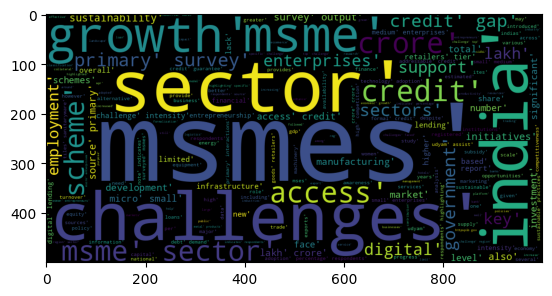

In [34]:
wordcloud=WordCloud(width=1000,height=500).generate(str(msme_words))
plt.imshow(wordcloud)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf=TfidfVectorizer(max_features=200,stop_words="english")

In [37]:
X_tfidf=tfidf.fit_transform(sent['text'])

In [38]:
pd.DataFrame(X_tfidf.toarray(),columns=tfidf.get_feature_names_out()).head()

,access,accessing,addressable,adoption,alternative,analysis,assessment,assist,assistance,availability,...,tiles,total,trade,turnover,udyam,understanding,various,women,wpr,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.553994,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.559428,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [39]:
# For Searching Balance Sheet & Profit & Loss from Annual Report & Extract
def search_txt_pdf(pdf_path,search_phrase):
  found_pages=[]
  with open(pdf_path,'rb') as file:
    reader=pypdf.PdfReader(file)
    for page_num in range(len(reader.pages)):
      page=reader.pages[page_num]
      page_text=page.extract_text()
      if search_phrase in page_text:
        found_pages.append(page_num+1)
        print(page_num)

In [40]:
file_path="/content/HUL IR 2024-25 CTOC 31-05-25 single pg High WEB-single page.pdf"

In [41]:
search_txt_pdf(file_path,"Standalone Balance Sheet") #to print balance sheet table

In [42]:
search_txt_pdf(file_path,"Standalone Balance Sheet")

In [43]:
for i,df in enumerate(fin_tables):
  print(f"Table {i+1}:\n{df}\n")

NameError: name 'fin_tables' is not defined